<a href="https://colab.research.google.com/github/GOODYSPEC/Goodness/blob/main/Copy_of_Kmean_Clustering_with_Penguin_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset consists of 5 columns.

culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
sex: penguin sex
Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: Adelie, Chinstrap, and Gentoo, so your task is to apply your data science skills to help them identify groups in the dataset!

In [ ]:
# Import all necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the customer dataset into pandas dataframe
df = pd.read_csv("/content/penguins.csv")

# Explore the dataframe with the head pandas dataframe method
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [ ]:
# Check for columns with missing values
df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [ ]:
# Check the rows where missing values exist accross all the columns
df[df.isnull().any(axis=1)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
339,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Handle/fill missing value on the sex column with the sex mode i.e highest occuring value
df.sex.fillna(df.sex.mode()[0], inplace=True)

<ipython-input-132-3857095e7773>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sex.fillna(df.sex.mode()[0], inplace=True)


In [ ]:
df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,0


In [ ]:
# Drop all rows with missing values
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


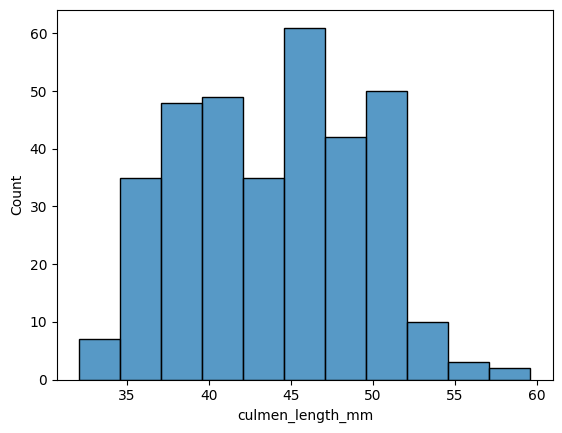

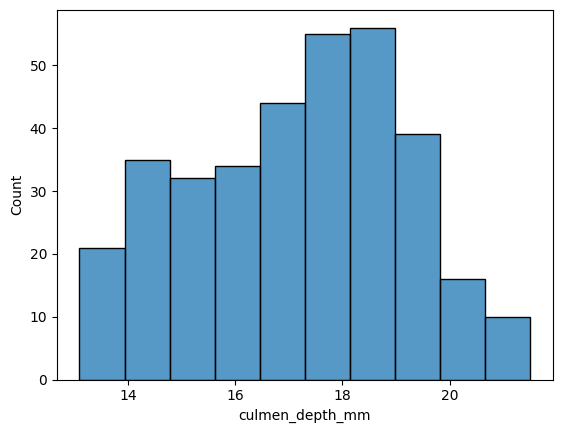

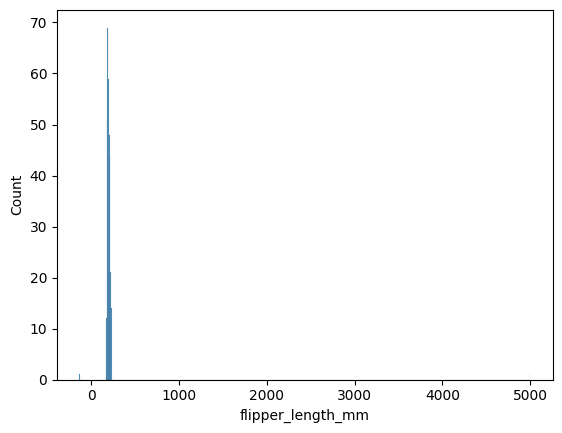

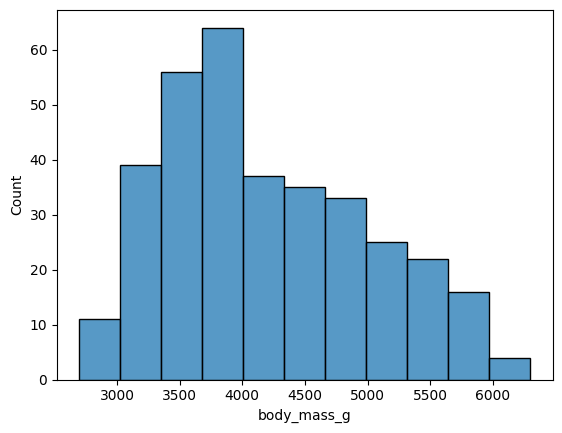

In [ ]:
# Exploring the numerical columns with histogram to check for their distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(df[i])
  plt.show()

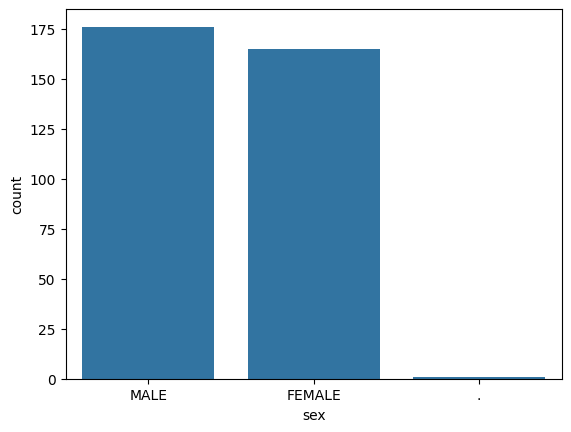

In [ ]:
# Exploring with bar chart for catigorical columns
sns.countplot(data=df, x="sex")
plt.show()

In [ ]:
df.sex.value_counts()

,count
sex,
MALE,176
FEMALE,165
.,1


In [ ]:
# Encoding and replacing non values
df.sex.replace({"MALE":1, "FEMALE":0, ".":0}, inplace=True)

<ipython-input-140-52815c441f14>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sex.replace({"MALE":1, "FEMALE":0, ".":0}, inplace=True)
<ipython-input-140-52815c441f14>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.sex.replace({"MALE":1, "FEMALE":0, ".":0}, inplace=True)


In [ ]:
df.sex.value_counts()

,count
sex,
1,176
0,166


In [ ]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# Identifying outliers
low, high = df['flipper_length_mm'].quantile([0.0, 1.0])

In [ ]:
low

-132.0

In [ ]:
high

5000.0

In [ ]:
df['flipper_length_mm'].mean()

np.float64(214.01461988304092)

In [ ]:
# Handling outliers
df.loc[(df['flipper_length_mm'] == low) | (df['flipper_length_mm'] == high), 'flipper_length_mm'] = 190

In [ ]:
df['flipper_length_mm'].quantile([0.0, 1.0])

,flipper_length_mm
0.0,172.0
1.0,231.0


In [ ]:
df['flipper_length_mm'].describe()

,flipper_length_mm
count,342.000000
mean,200.891813
std,14.073227
min,172.000000
25%,190.000000
50%,197.000000
75%,213.000000
max,231.000000


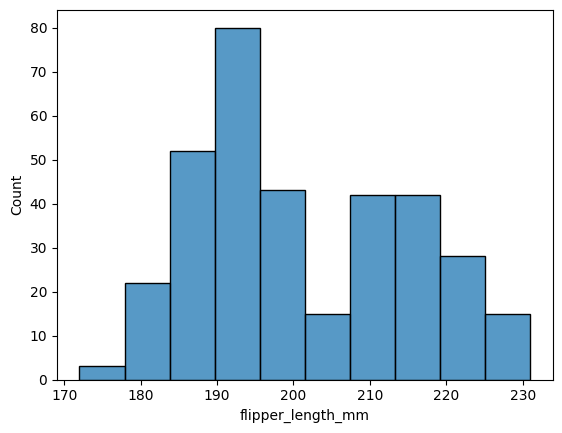

In [ ]:
sns.histplot(df['flipper_length_mm'])
plt.show()

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [ ]:
# Scaling or standardize the data
scale = StandardScaler()
X = scale.fit_transform(df)

In [ ]:
# Computing the Elbow method to confirm that we are doing three (3) clusters
intertia = []
for i in range(1, 11):
  model = KMeans(n_clusters=i, random_state=2)
  model.fit(X)
  intertia.append(model.inertia_)

intertia

[1709.9999999999995,
 907.3635155213964,
 601.7876480111507,
 410.6905456954866,
 302.8459990588027,
 236.15356026318722,
 228.62941825745634,
 204.29715859674565,
 192.5647137082281,
 172.88504215932903]

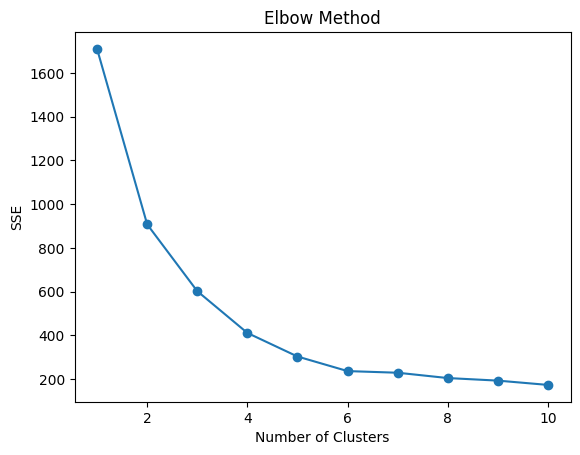

In [ ]:
plt.plot(range(1, 11), intertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(X)

df['species'] = model.labels_

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,39.1,18.7,181.0,3750.0,1,2
1,39.5,17.4,186.0,3800.0,0,0
2,40.3,18.0,195.0,3250.0,0,0
4,36.7,19.3,193.0,3450.0,0,0
5,39.3,20.6,190.0,3650.0,1,2


In [ ]:
df.species.value_counts()

,count
species,
1,123
2,112
0,107


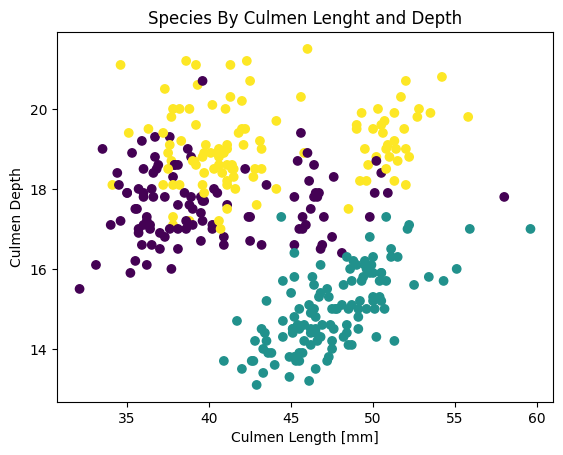

In [ ]:
plt.scatter(x=df['culmen_length_mm'], y=df['culmen_depth_mm'], c=df.species)
plt.xlabel("Culmen Length [mm]")
plt.ylabel("Culmen Depth")
plt.title("Species By Culmen Lenght and Depth")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,39.1,18.7,181.0,3750.0,1,2
1,39.5,17.4,186.0,3800.0,0,0
2,40.3,18.0,195.0,3250.0,0,0
4,36.7,19.3,193.0,3450.0,0,0
5,39.3,20.6,190.0,3650.0,1,2


In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.891813,4201.754386,0.514620,1.014620
std,5.459584,1.974793,14.073227,801.954536,0.500519,0.801258
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000,2.000000


In [ ]:
pen = df.drop(['sex', 'species', 'body_mass_g'], axis=1)
stand = StandardScaler()
pen_df = stand.fit_transform(pen)

In [ ]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage="complete")
cluster_model.fit(pen_df)
pen['labels'] = cluster_model.labels_

In [ ]:
pen.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,labels
0,39.1,18.7,181.0,1
1,39.5,17.4,186.0,1
2,40.3,18.0,195.0,1
4,36.7,19.3,193.0,1
5,39.3,20.6,190.0,1


In [ ]:
pen.labels.value_counts()

,count
labels,
1,180
0,123
2,39


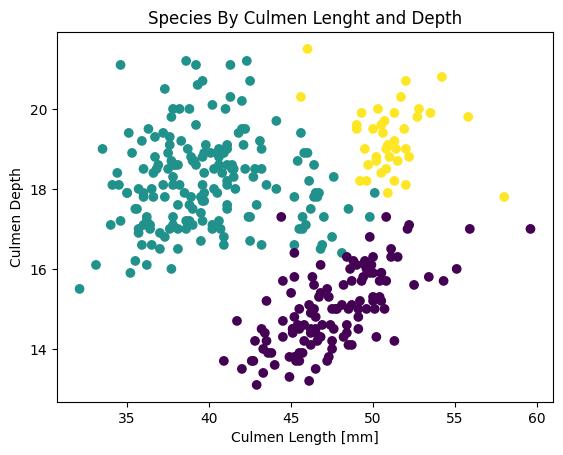

In [ ]:
plt.scatter(x=pen['culmen_length_mm'], y=pen['culmen_depth_mm'], c=pen.labels)
plt.xlabel("Culmen Length [mm]")
plt.ylabel("Culmen Depth")
plt.title("Species By Culmen Lenght and Depth")
plt.show()

In [ ]:
clusters = hierarchy.linkage(pen_df, method="complete")

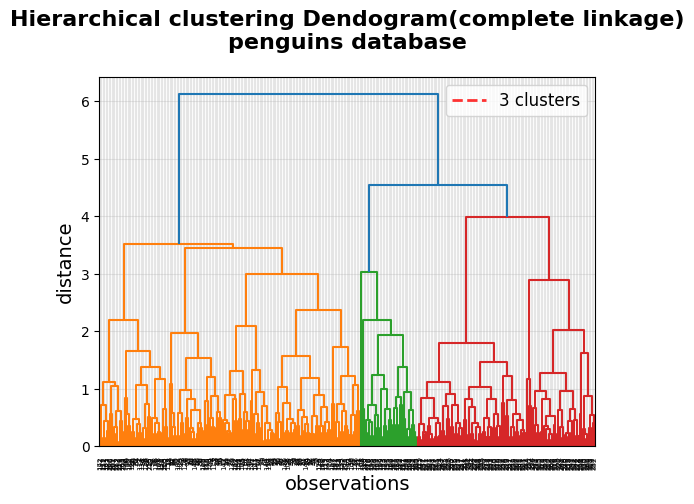

In [ ]:
dendo = hierarchy.dendrogram(clusters)
plt.axhline(35, color='red', linestyle='--',linewidth=2,alpha=0.8)
plt.axhline(y=150, color='red', linestyle='--',linewidth=2,label='3 clusters',alpha=0.8)
plt.title('Hierarchical clustering Dendogram(complete linkage)\npenguins database',
          fontsize=16,fontweight='bold',pad=20)
plt.xlabel("observations", fontsize=14)
plt.ylabel("distance", fontsize=14)
plt.legend(fontsize = 12, loc="upper right")
plt.grid(True, alpha=0.3)